In [1]:
using Laplacians

In [2]:
include("../../src/samplingTreeSolver.jl")

purge (generic function with 1 method)

In [3]:
n = 100000;
b = rand(n); b = b - mean(b);

In [4]:
tbuild = [Float64[] for i in 1:5]
tsolve = [Float64[] for i in 1:5]
ks = [Float64[] for i in 1:5]
betas = [Float64[] for i in 1:5]
solverNorms = [Float64[] for i in 1:5]
err = [Float64[] for i in 1:5]
times = [1,1.5,2,2.5,3]
sampConst = 0.015

for i in 1:5
    a = chimera(n, i);
    la = lap(a);
    
    for beta in 1:10
        for t in times
            k = beta * t;
            tic()
            f = samplingSolver(a, eps = 0.5, sampConst = sampConst, k = 1.0 * k * log(n), beta = 1.0 * beta * log(n))
            push!(tbuild[i], toc())
            
            _,gOp,_,_,_ = buildSolver(a, eps = 0.5, sampConst = sampConst, k = 1.0 * k * log(n), beta = 1.0 * beta * log(n))
            push!(err[i], checkError(gOp))
            
            tic()
            nrm = norm(la * f(b) - b)
            push!(solverNorms[i], nrm)
            push!(tsolve[i], toc())
            
            push!(betas[i], beta)
            push!(ks[i], k)
            
            println()
        end
        
        println()
        println("Done for beta = ", beta)
        println()
    end
    
    println()
    println()
    println()
    println("Done for i = ", i)
    println()
    println()
    println()
    
end

Time to build the tree and compute the stretch: elapsed time: 1.354321519 seconds
The mean value of multiedges in the graph: 5.258026690784423; The number of multiedges in the graph = 380356
elapsed time: 27.901682113 seconds
Time to build the tree and compute the stretch: elapsed time: 2.204983453 seconds
The mean value of multiedges in the graph: 5.322597776819611; The number of multiedges in the graph = 380356
PCG stopped after: 27 iterations with relative error 9.095325206003986e-7.
elapsed time: 9.395271609 seconds

Time to build the tree and compute the stretch: elapsed time: 1.996105192 seconds
The mean value of multiedges in the graph: 4.578310845628832; The number of multiedges in the graph = 380356
elapsed time: 26.04574747 seconds
Time to build the tree and compute the stretch: elapsed time: 2.211764093 seconds
The mean value of multiedges in the graph: 4.532285543017594; The number of multiedges in the graph = 380356
PCG stopped after: 28 iterations with relative error 6.06

In [5]:
err[1]'

1x50 Array{Float64,2}:
 0.455336  0.608005  0.69172  0.638932  …  0.448881  0.375636  0.395202

In [6]:
err[2]'

1x50 Array{Float64,2}:
 1.00511  1.46845  1.26259  1.56375  1.44937  …  0.890646  1.08761  0.743766

In [7]:
err[3]'

1x50 Array{Float64,2}:
 0.966288  1.22091  1.2493  1.27589  1.51417  …  0.770478  0.956001  0.852303

In [8]:
err[4]'

1x50 Array{Float64,2}:
 0.392473  0.478823  0.457631  0.573147  …  0.556129  0.439788  0.400115

In [9]:
err[5]'

1x50 Array{Float64,2}:
 0.97104  1.14796  1.31425  1.78308  1.46362  …  0.994848  0.948511  0.972689

In [10]:
ks[4]'

1x50 Array{Float64,2}:
 1.0  1.5  2.0  2.5  3.0  2.0  3.0  …  27.0  10.0  15.0  20.0  25.0  30.0

In [11]:
betas[4]'

1x50 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  …  9.0  10.0  10.0  10.0  10.0  10.0

In [12]:
using PyPlot

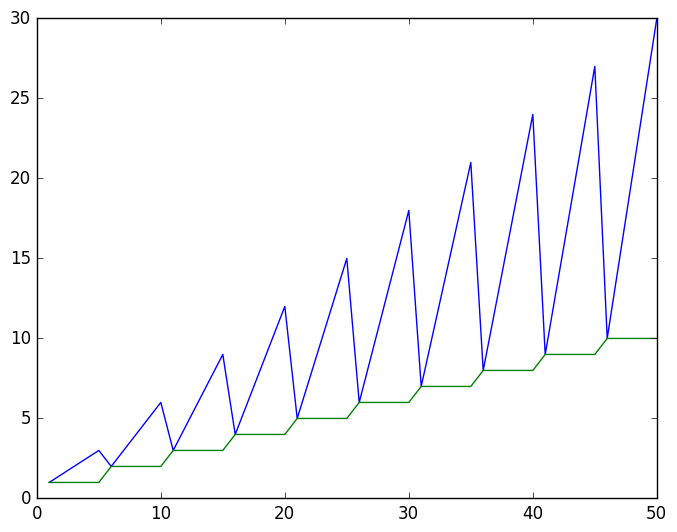

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x309db4f50>

In [13]:
plot(1:50, ks[1])
plot(1:50, betas[1])

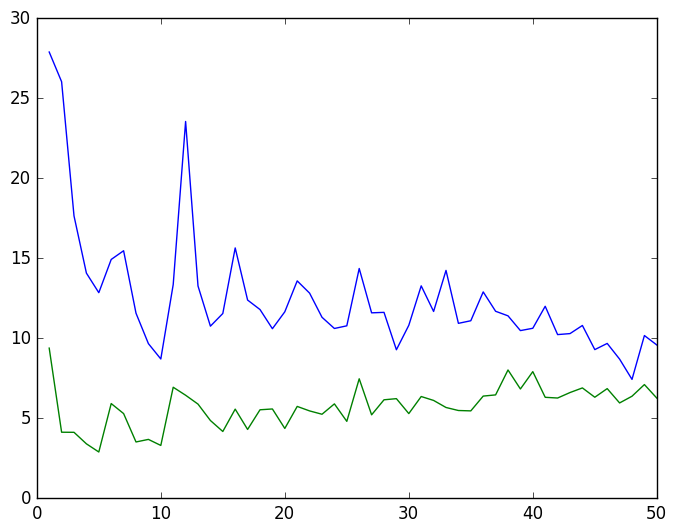

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x309db9110>

In [14]:
plot(1:50, tbuild[1])
plot(1:50, tsolve[1])

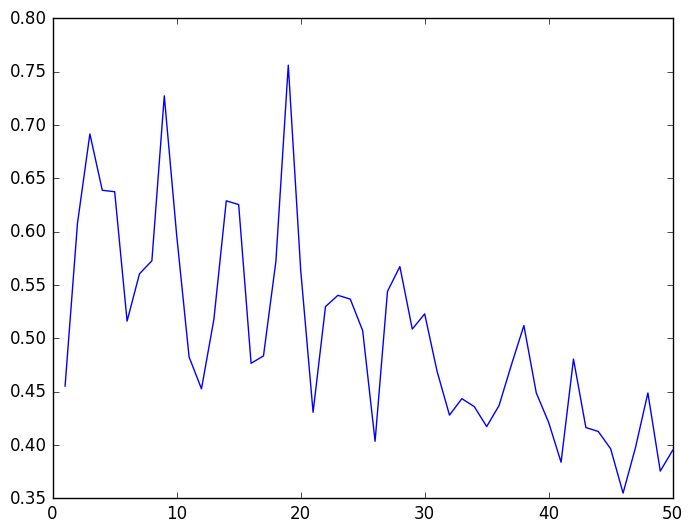

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3139ac890>

In [15]:
plot(1:50, err[1])

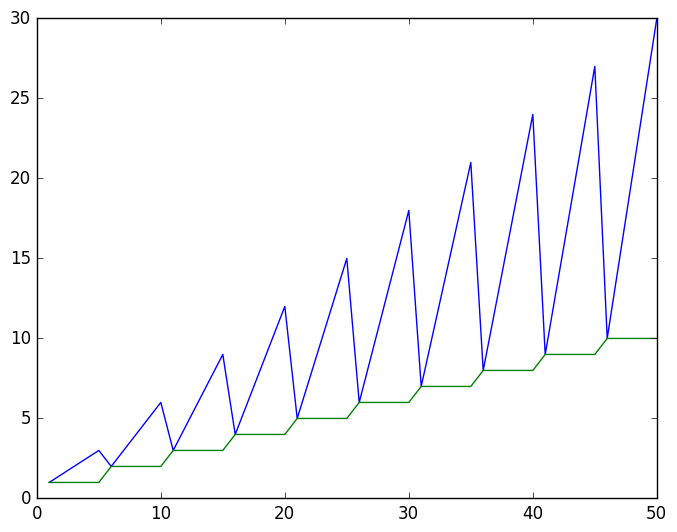

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3135da250>

In [16]:
plot(1:50, ks[2])
plot(1:50, betas[2])

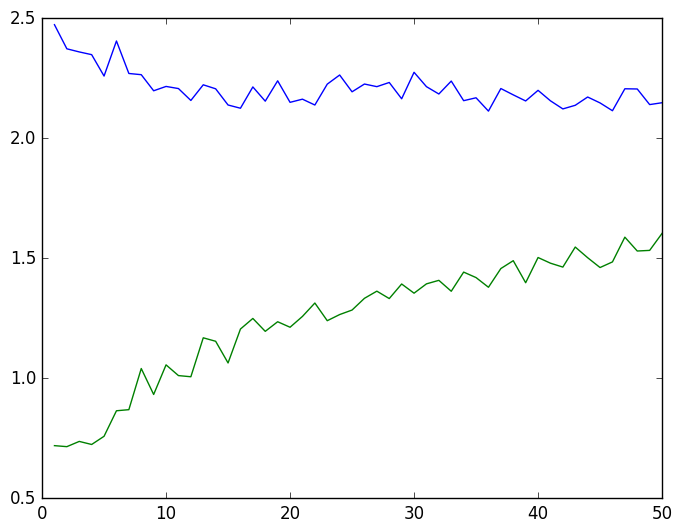

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31abdb890>

In [17]:
plot(1:50, tbuild[2])
plot(1:50, tsolve[2])

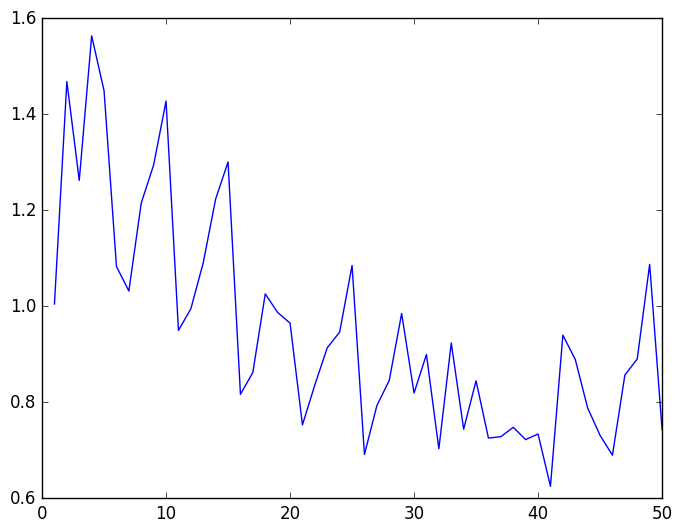

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31bac3750>

In [18]:
plot(1:50, err[2])

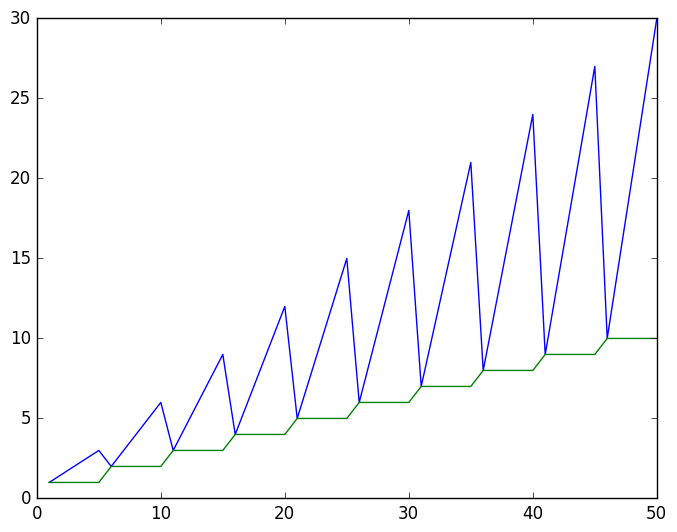

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31baf6350>

In [19]:
plot(1:50, ks[3])
plot(1:50, betas[3])

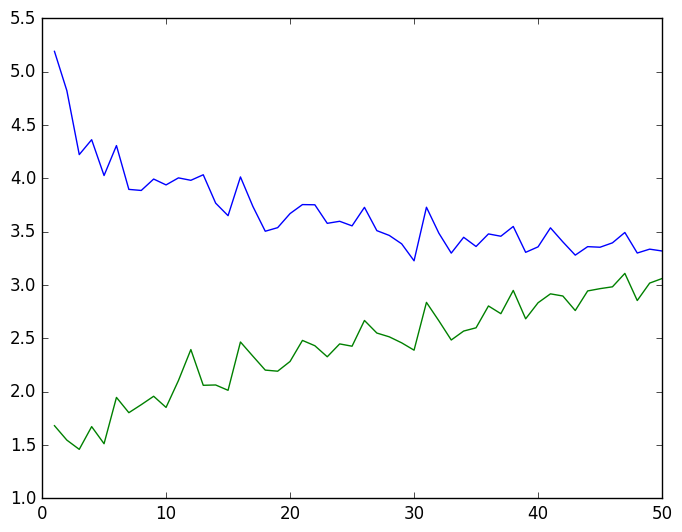

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c3dd710>

In [20]:
plot(1:50, tbuild[3])
plot(1:50, tsolve[3])

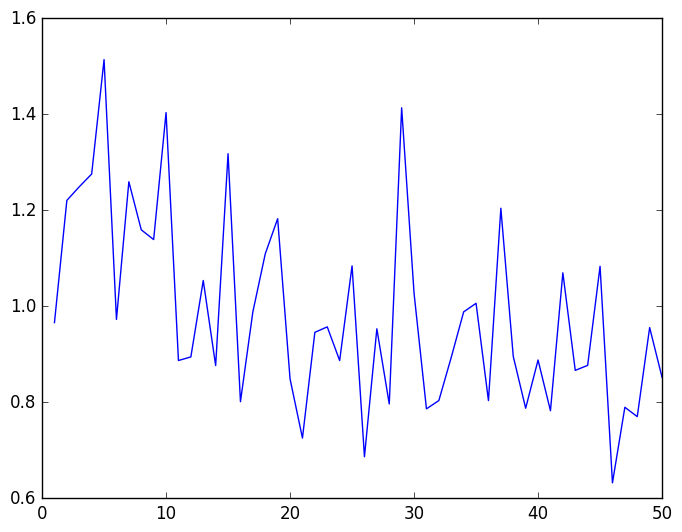

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c909950>

In [21]:
plot(1:50, err[3])

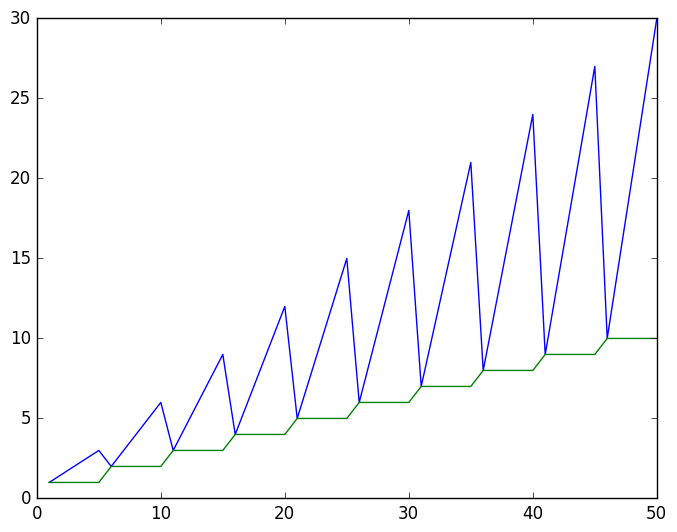

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c7852d0>

In [22]:
plot(1:50, ks[4])
plot(1:50, betas[4])

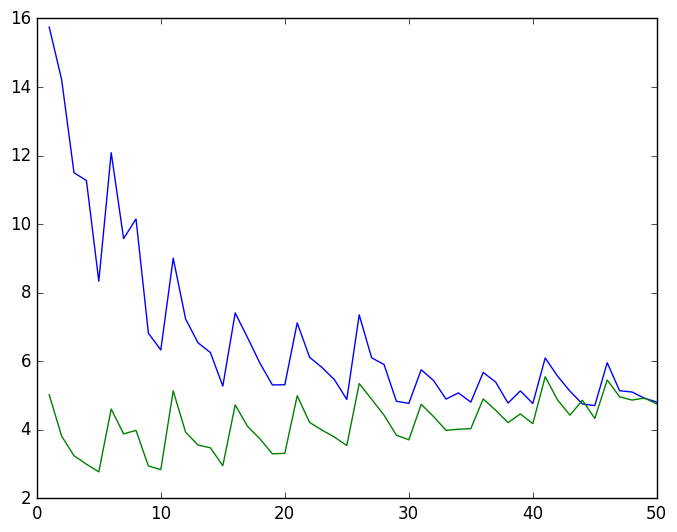

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31cab2750>

In [23]:
plot(1:50, tbuild[4])
plot(1:50, tsolve[4])

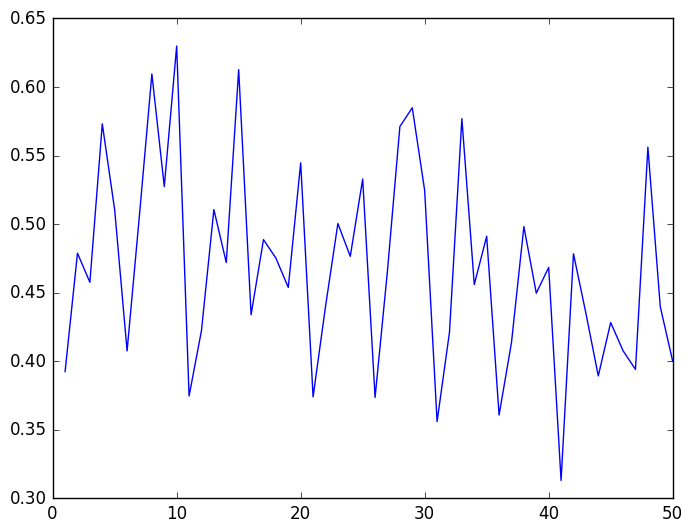

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31edae350>

In [24]:
plot(1:50, err[4])

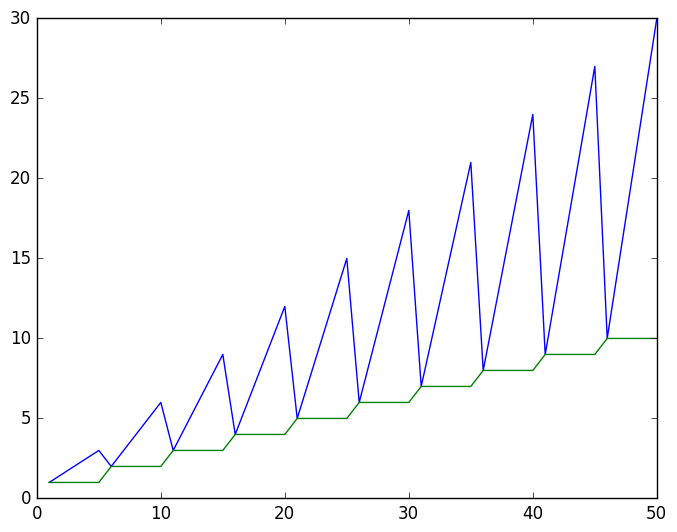

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31efd5a50>

In [25]:
plot(1:50, ks[5])
plot(1:50, betas[5])

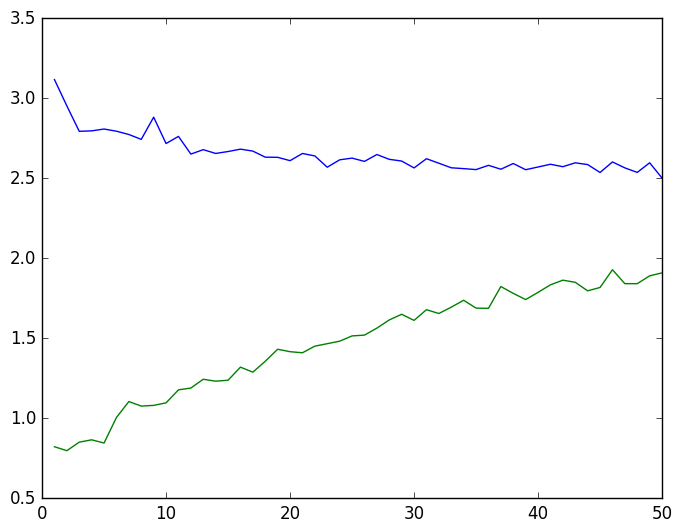

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31efe0a10>

In [26]:
plot(1:50, tbuild[5])
plot(1:50, tsolve[5])

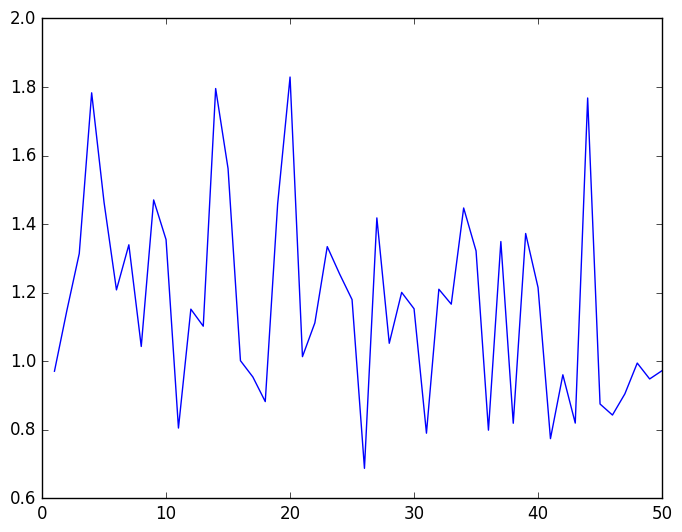

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31f8e1190>

In [27]:
plot(1:50, err[5])